# Forecasts and Predictions of costumers chrn

The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.<br>
I'm here to understand the one of the most common problems gyms and other services face is **customer churn**.

**We will try to help with those two tools-**
1. Predict customer abandonment using customer data (real time).
2. Classification of customers into groups and thereby finding a group or groups that will constitute "high risk groups for abandonment".

Once the business owners know this data, they will be able to easily increase profits, if of course they improve the findings.

<a class="anchor" id="1"></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1---Openning-data" data-toc-modified-id="Step-1---Openning-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Step 1 - Openning data</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Step-2---Exploratory-data-analysis-(EDA)" data-toc-modified-id="Step-2---Exploratory-data-analysis-(EDA)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Step 2 - Exploratory data analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Step-2---Conclusions" data-toc-modified-id="Step-2---Conclusions-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Step 2 - Conclusions</a></span></li></ul></li><li><span><a href="#Step-3---ML-model-to-predict-user-churn" data-toc-modified-id="Step-3---ML-model-to-predict-user-churn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Step 3 - ML model to predict user churn</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression-Model" data-toc-modified-id="Logistic-Regression-Model-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Logistic Regression Model</a></span></li><li><span><a href="#Random-Forest-Model" data-toc-modified-id="Random-Forest-Model-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest Model</a></span></li><li><span><a href="#Gradient-Boosting-Model" data-toc-modified-id="Gradient-Boosting-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gradient Boosting Model</a></span></li><li><span><a href="#Bernoulli-Naive-Bayes-Model" data-toc-modified-id="Bernoulli-Naive-Bayes-Model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Bernoulli Naive Bayes Model</a></span></li><li><span><a href="#Comparing-the-Models-for-Picking-the-Best-One-" data-toc-modified-id="Comparing-the-Models-for-Picking-the-Best-One--3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Comparing the Models for Picking the Best One-</a></span></li><li><span><a href="#Step-3---Conclusion" data-toc-modified-id="Step-3---Conclusion-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Step 3 - Conclusion</a></span></li></ul></li><li><span><a href="#User-clusters" data-toc-modified-id="User-clusters-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>User clusters</a></span><ul class="toc-item"><li><span><a href="#Clusters-conclusions-" data-toc-modified-id="Clusters-conclusions--4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Clusters conclusions-</a></span></li><li><span><a href="#Distributions-of-features-for-the-clusters" data-toc-modified-id="Distributions-of-features-for-the-clusters-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Distributions of features for the clusters</a></span></li><li><span><a href="#Step-4---Conclusions" data-toc-modified-id="Step-4---Conclusions-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Step 4 - Conclusions</a></span></li></ul></li><li><span><a href="#Step-5---Overall-Conclusions-&amp;-Recommendations" data-toc-modified-id="Step-5---Overall-Conclusions-&amp;-Recommendations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Step 5 - Overall Conclusions &amp; Recommendations</a></span></li></ul></div>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB

from sklearn.cluster import KMeans

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

import scikitplot.metrics as splt

from scipy.cluster.hierarchy import dendrogram, linkage 


gym = pd.read_csv('/datasets/gym_churn_us.csv', sep=',')

 [Go Up.](#1)⏫

## Step 1 - Openning data

In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
gym.head(4)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0


### Conclusion 

In the present research we are working with a data set of the customer behaviour for the gym chain. 

The data was saved as a table: **gym**. Its total length is 4000 rows, every row represents one customer and his/her characteristics in columns: 
- User data for the preceding month: gender — assumption is that 0 is male, 1 is female; Near_Location - whether the user lives or works in the neighborhood where the gym is located; Partner - whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers); Promo_friends - whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership); Phone - whether the user provided their phone number; Age - age of the customer; Lifetime - time (in months) since the customer first came to the gym;
- Data from the log of visits and purchases and data on current membership status: Contract_period - 1 month, 3 months, 6 months, or 1 year; Month_to_end_contract - the months remaining until the contract expires; Group_visits - whether the user takes part in group sessions; Avg_class_frequency_total - average frequency of visits per week over the customer's lifetime; Avg_class_frequency_current_month - average frequency of visits per week over the preceding month; Avg_additional_charges_total - he total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc; Churn - the fact of churn for the month in question.

Note: general assumption for all cases besides gender: 0 = no, 1 = yes; gender: 0 = female, 1 = male.

 [Go Up.](#1)⏫

## Step 2 - Exploratory data analysis (EDA)

In [5]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [6]:
gym[gym.duplicated()]

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn


There isn't duplicated values

In [7]:
gym['Month_to_end_contract'] = gym['Month_to_end_contract'].astype('int')

Convert float to desire type - int.

In [8]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null int64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 437.6 KB


- No missing values.
- No duplicated values.
- There is more mens than womens.
- Most customers lived near a gym location
- Almost equal amount of customers are employees of a partner company and are not employees.
- Most customers were not recommended with a promotional code from a friend.
- The average number of months a customer has had a gym contract is almost 5 months.
- Most customers are around 30 years old.
- Most customers have about 4 months remaining on their contract.
- Most customers have only had a contract for the past 4 months.
- The average number of customers come almost twice a week and the churn rate leans towards 0 which means that most customers did not churn (did not stop subscribing).

 [Go Up.](#1)⏫

**Values for the contract period-**

In [9]:
gym.Contract_period.value_counts().sort_values(ascending = False)

1     2207
12     960
6      833
Name: Contract_period, dtype: int64

Most customers choose 1 month

**Now let's check the mean feature values in two groups:**
1. For those who left (churn).
2. For those who stayed.

In [10]:
display(gym.groupby('Churn').size())
gym.groupby('Churn').mean()

Churn
0    2939
1    1061
dtype: int64

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


I did not quite understand what you mean here.<br
If I'm missing something, I'd love for you to write me something because I'm really far behind, thanks!

- This data grouping shows that an equal amount of male and female customers decide to renew or not renew. 

- It shows that most of the people who do not renew do not live near a gym location, are not employees of a partner company and were not given a promotional code by a friend. 

- Those who decide not to renew their membership had a 6 month long contract, did attend group sessions, were almost 30 years old, spent over 150 dollars on additional gym services, had about 5 months remaining on the contract, had been a member for almost 5 months and visit about twice a week. 

- Those who decided to renew their membership had an almost 2 month long contract, did not attend group sessions, were about 27 years old, spent less than 150 dollars on additional gym services, had about 1.5 months remaining in the contract, had been a member for 1 month and visit the gym an average of once a week. 

 [Go Up.](#1)⏫

**Now we'll plot bar histograms and feature distributions for those who churn and those who stayed-**

In [11]:
def plot_dist(df, feature):
    colors = ['#073b4c','#ffd166','#06d6a0','#118ab2']
    plt.figure(figsize=(15,15))
    the_grid = GridSpec(5, 3)

    for i, column in enumerate(df.drop(feature, axis = 1).columns):
        plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
        values = len(df[column].unique())
        features = sorted(df[feature].unique())

        if values > 12:    
            for i,x in enumerate(features):
                sns.distplot(df[df[feature] == x][column], hist = False, 
                             kde_kws = {'shade': True, 'linewidth': 3}, color=colors[i])
        else:
            sns.countplot(column, hue=feature, data=gym, palette=colors, alpha=.5, saturation=1)
            plt.gca().get_legend().remove()

            if values == 2:
                if column == 'gender':
                    plt.xticks(np.arange(values),('F','M')) 
    
                    if feature == 'Churn':
                        legend = ['Stayed','Left']
                    else:
                        legend = features
                    plt.legend(legend, shadow=True, fancybox=True, title=feature, loc='best')
                else:
                    plt.xticks(np.arange(values),('NO','YES'))
            else:
                plt.xticks(np.arange(values),[int(x) for x in sorted(df[column].unique())])
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle('Feature distributions between Staying and Leaving', fontsize=24, y=1.02)
    plt.show()

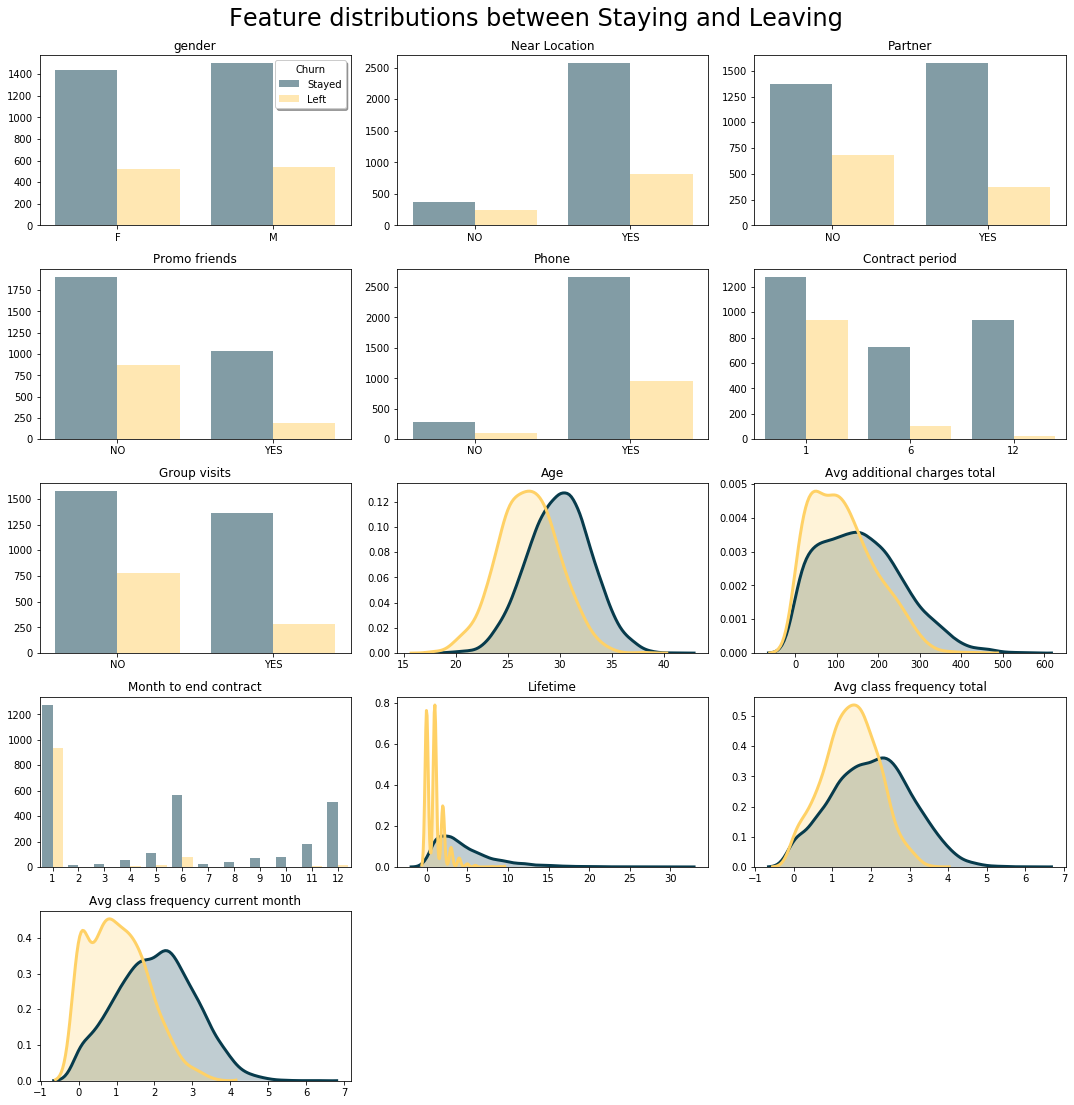

In [12]:
plot_dist(gym,'Churn')

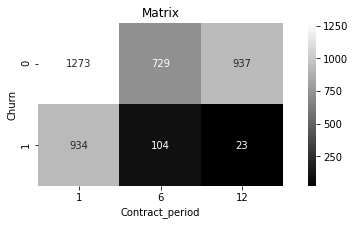

In [13]:
viz = gym.pivot_table(index='Churn', columns='Contract_period', values='Age', aggfunc='count')
plt.subplots(figsize=(9, 3))
sns.heatmap(viz, square = True, annot = True, fmt='.0f', cmap='gist_yarg_r')
plt.title('Matrix')
plt.show()

- **Age:** Younger customers (between the ages of 20 and 25) tended to churn. After the age of 25, customers tended not to churn. 

- **Lifetime:** The most customers who had a 1 month contract (possible a trial period), ended up churning. However, many more of the customers who had the same 1 month contract did not churn so perhaps this trial period worked for some customers.

- **Month to end:** The customers are more likely to churn when they have to choose whether to renew their contract or not (at 1 month remaining on the contract). Customers who do not churn renew their contract at either 1 month, 6 months or 12 months.

- **Avg class total:** The customers who did not churn visited the gym must more frequently on a weekly basis than customers who churned. 

- **Avg current month:** There is huge amount of customers who churn did not visit the gym last month or visited the gym less than once a week. 

 [Go Up.](#1)⏫

**Now, let's build a correlation matrix-**

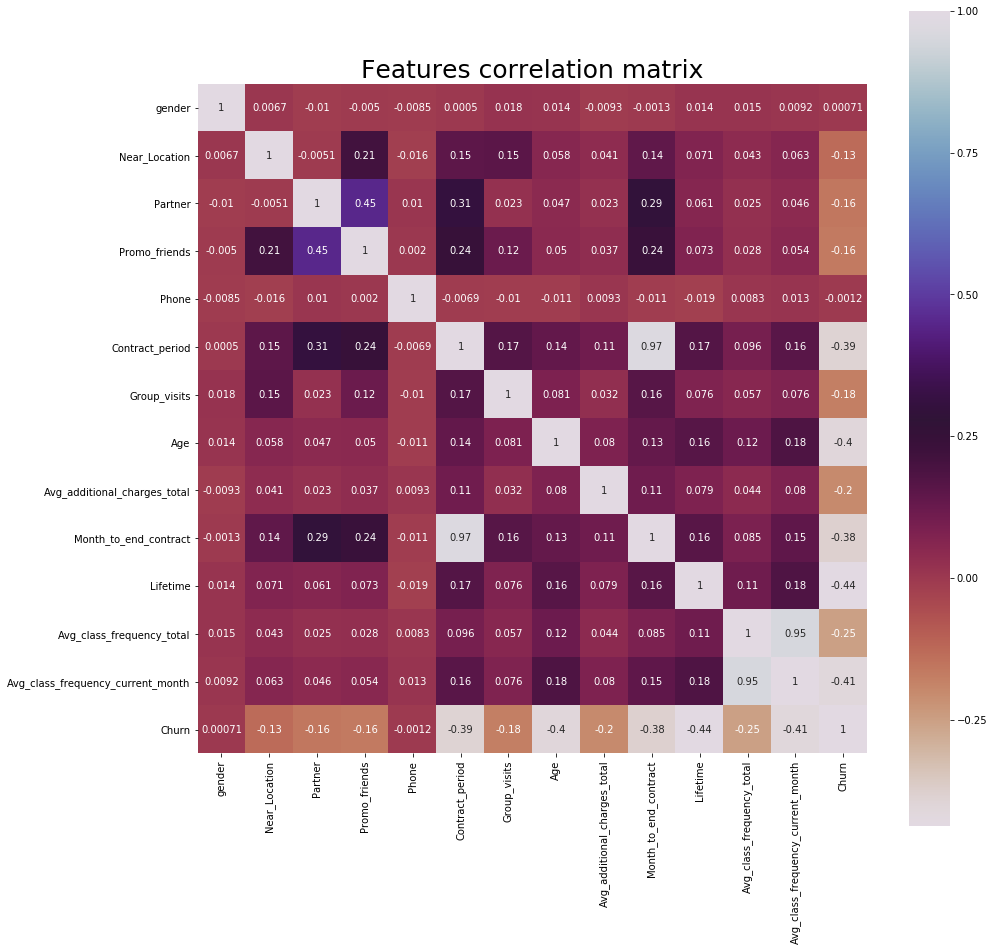

In [14]:
corr_m = gym.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(corr_m, square = True, annot = True, cmap="twilight_r")
plt.title('Features correlation matrix', size = 25)
plt.show()

* The strongest correlations in features we see between **lifetime frequency for the average class** vs for the **last month frequency** - 95%; 
* And **contract length** vs **time to the end of contract** - 97%.

 [Go Up.](#1)⏫

### Step 2 - Conclusions

**Missing features-**
* There was no missing features
* We studied the mean values and standard deviation , there is no anomalies.

**Numbers-**
* Gender is distributed almost equally in churn and not churn.
* Most clients live near the gym.
* Among those who left - 35% of customers are employees of a partner companies vs 53% for those who stayed.
* Most of customers provide their phone number in both groups.
* Average contract lenth is almost 6 months for those who stayed vs 1.7 months for those who left.
* Average customer age is 30 years old for those who stayed vs 27 who those who left.
* Average a customer spend 158 dollars  on additional charges for those who stayed vs 115 for those who left.
* Average lifetime is 4.7 months for those who stayed vs 1 month for those who left and the average class frequency per week during lifetime is 2 for those who stayed vs 1 for those who left.

**Correlations-**
* The strongest correlations is between lifetime frequency for the average class and  the last month frequency - 95%;
* And contract length vs time to the end of contract - 97%.

 [Go Up.](#1)⏫

## Step 3 - ML model to predict user churn

**We'll build a binary classification model for customers where the target feature is the user's leaving next month.**
1. Dividing the data into train and validation sets using the train_test_split() function.
2. Training the model on the train set with two methods:
    * **logistic regression**
    * **random forest**
3. Evaluating accuracy, precision, and recall for both models using the validation data. 

**We'll define the random_state parameter to 0.**

First- Let's build a function to print all measure metrics-

In [15]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Classification metrics'):
    print(title) 
    print('Accuracy:          {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('Balanced Accuracy: {:.2f}'.format(balanced_accuracy_score(y_true, y_pred)))
    print('Precision:         {:.2f}'.format(precision_score(y_true, y_pred)))
    print('Recall:            {:.2f}'.format(recall_score(y_true, y_pred)))
    print('F1:                {:.2f}'.format(f1_score(y_true, y_pred)))
    print('ROC_AUC:           {:.2f}'.format(roc_auc_score(y_true, y_proba)))

Our target feature is 'Churn':

In [16]:
display(gym['Churn'].value_counts())
print('Dataset size:', gym.shape)

0    2939
1    1061
Name: Churn, dtype: int64

Dataset size: (4000, 14)


Divide the data into features (the X matrix) and a target variable (y)-

In [17]:
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

Divide the data into train and test sets-

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Train StandardScaler on the train set-

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Transform train and test sets-

In [20]:
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

 [Go Up.](#1)⏫

###  Logistic Regression Model

In [21]:
lr_model = LogisticRegression(solver='liblinear', random_state = 0)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

Print all metrics-

In [22]:
lr=print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Metrics for logistic regression:')
lr

Metrics for logistic regression:
Accuracy:          0.92
Balanced Accuracy: 0.89
Precision:         0.85
Recall:            0.83
F1:                0.84
ROC_AUC:           0.72


**Let's prodouce the ROC-**

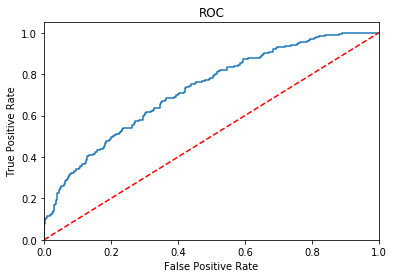

In [23]:
lr_roc_auc = roc_auc_score(y_test, lr_predictions)
fpr, tpr, thresholds = roc_curve(y_test, lr_probabilities)

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

* Red line indicates the success that if we didn't create any model, the fundamental success.
* When the area gets higher, it means that our success is getting better and better. (AUC - Area Under Curve)

**Confusion matrix-**

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       602
           1       0.85      0.83      0.84       198

    accuracy                           0.92       800
   macro avg       0.90      0.89      0.89       800
weighted avg       0.92      0.92      0.92       800

AxesSubplot(0.125,0.125;0.62x0.755)


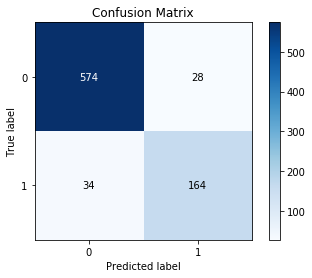

In [24]:
print(classification_report(y_test,lr_predictions)) # Classification report
print(splt.plot_confusion_matrix(y_test,lr_predictions)) # Confusion matrix
plt.show();

 [Go Up.](#1)⏫

###  Random Forest Model

In [25]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train_st, y_train)
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

Print all metrics-

In [26]:
rf=print_all_metrics(y_test,rf_predictions,rf_probabilities, title = 'Metrics for random forest:')
rf

Metrics for random forest:
Accuracy:          0.92
Balanced Accuracy: 0.88
Precision:         0.84
Recall:            0.81
F1:                0.83
ROC_AUC:           0.97


**Confusion matrix-**

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       602
           1       0.84      0.81      0.83       198

    accuracy                           0.92       800
   macro avg       0.89      0.88      0.88       800
weighted avg       0.91      0.92      0.91       800

AxesSubplot(0.125,0.125;0.62x0.755)


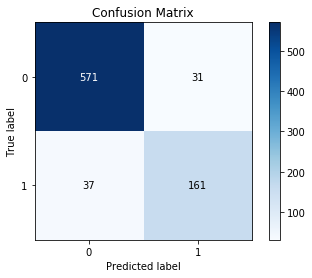

In [27]:
print(classification_report(y_test,rf_predictions)) # Classification report
print(splt.plot_confusion_matrix(y_test,rf_predictions)) # Confusion matrix
plt.show();

 [Go Up.](#1)⏫

###  Gradient Boosting Model

In [28]:
gb_model = GradientBoostingClassifier(n_estimators = 100, random_state = 0)
gb_model.fit(X_train_st, y_train)
gb_predictions = gb_model.predict(X_test_st)
gb_probabilities = gb_model.predict_proba(X_test_st)[:,1]

Print all metrics-

In [29]:
gb=print_all_metrics(y_test, gb_predictions,gb_probabilities,title = 'Metrics for gradient boosting:')
gb

Metrics for gradient boosting:
Accuracy:          0.93
Balanced Accuracy: 0.90
Precision:         0.88
Recall:            0.84
F1:                0.86
ROC_AUC:           0.98


**Confusion matrix-**

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       602
           1       0.88      0.84      0.86       198

    accuracy                           0.93       800
   macro avg       0.91      0.90      0.91       800
weighted avg       0.93      0.93      0.93       800

AxesSubplot(0.125,0.125;0.62x0.755)


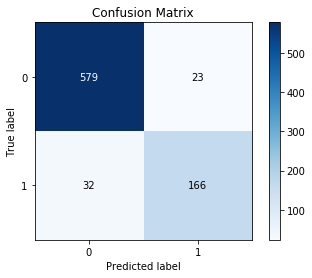

In [30]:
print(classification_report(y_test,gb_predictions)) # Classification report
print(splt.plot_confusion_matrix(y_test,gb_predictions)) # Confusion matrix
plt.show();

 [Go Up.](#1)⏫

###  Bernoulli Naive Bayes Model
* Bernoulli NB is applied because it's really effective when the output label is binary like in our case.
* Naive Bayes classifier for multivariate Bernoulli models.

In [31]:
bn_model = BernoulliNB() 
bn_model.fit(X_train_st, y_train)
bn_predictions = bn_model.predict(X_test_st)
bn_probabilities = bn_model.predict_proba(X_test_st)[:,1]

Print all metrics-

In [32]:
bn=print_all_metrics(y_test,bn_predictions,bn_probabilities, title = 'Metrics for Bernoulli Naive Bayes Model:')
bn

Metrics for Bernoulli Naive Bayes Model:
Accuracy:          0.86
Balanced Accuracy: 0.85
Precision:         0.67
Recall:            0.83
F1:                0.74
ROC_AUC:           0.91


**Confusion matrix-**

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       602
           1       0.67      0.83      0.74       198

    accuracy                           0.86       800
   macro avg       0.81      0.85      0.82       800
weighted avg       0.87      0.86      0.86       800

AxesSubplot(0.125,0.125;0.62x0.755)


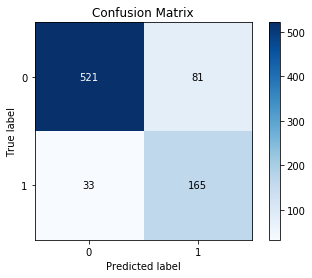

In [33]:
print(classification_report(y_test,bn_predictions)) # Classification report
print(splt.plot_confusion_matrix(y_test,bn_predictions)) # Confusion matrix
plt.show();

 [Go Up.](#1)⏫

### Comparing the Models for Picking the Best One-

In [34]:
models = [lr_model,rf_model,gb_model,bn_model]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test_st)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))

----------------------------
LogisticRegression:
Accuracy: 92.2500%
----------------------------
RandomForestClassifier:
Accuracy: 91.5000%
----------------------------
GradientBoostingClassifier:
Accuracy: 93.1250%
----------------------------
BernoulliNB:
Accuracy: 85.7500%


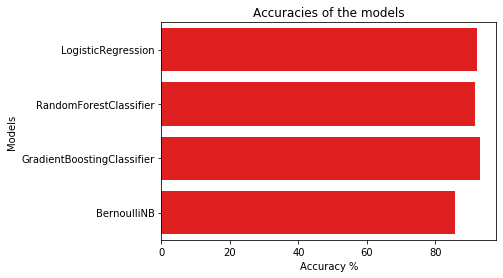

In [35]:
result = []
results = pd.DataFrame(columns= ["Models","Accuracy"])
max_model = 0
for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test_st)
    accuracy = accuracy_score(y_test, y_pred)  
    result = pd.DataFrame([[names, accuracy*100]], columns= ["Models","Accuracy"])
    results = results.append(result)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracies of the models');

 [Go Up.](#1)⏫

### Step 3 - Conclusion

**I decided to add two more models to test the train set.**
<br>
**The four models are-**
1. LogisticRegression
2. RandomForestClassifier
3. GradientBoostingClassifier
4. BernoulliNB

**In the test indices we got different results and here is the summary:**

* **Accuracy:** Is the share of accurate predictions among all predictions where the close to 1, the better.<br>
For this metric, **GradientBoostingClassifier** has a better score.

* **Precision:** Tells us what share of predictions in class 1 are true by looking at the share of correct answers only in the target class, where the locse to 1 the better.<br>
For this metric, **GradientBoostingClassifier** has a better score.

* **Recall:** Aims at minimizing the opposite risks by demonstrating the number of real class 1 objects you were able to discover with your model where the closer to 1, the better.<br>
For this metric, **GradientBoostingClassifier** has a better score.

In the all metrics, the **GradientBoostingClassifier** model gave better results.

* We can see the power of the collective model - how much higher ROC_AUC is with random forest compared with logistic regression. 
* This metric conveys maximum information about the quality of a model.

 [Go Up.](#1)⏫

## User clusters 

We'll set aside the column with data on churn and identify object (user) clusters-

**Standardizing the data-**

In [36]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(gym.drop(columns = ['Churn']))

**We'll use the linkage() function to build a matrix of distances based on the standardized feature matrix and ploting a dendrogram-** 

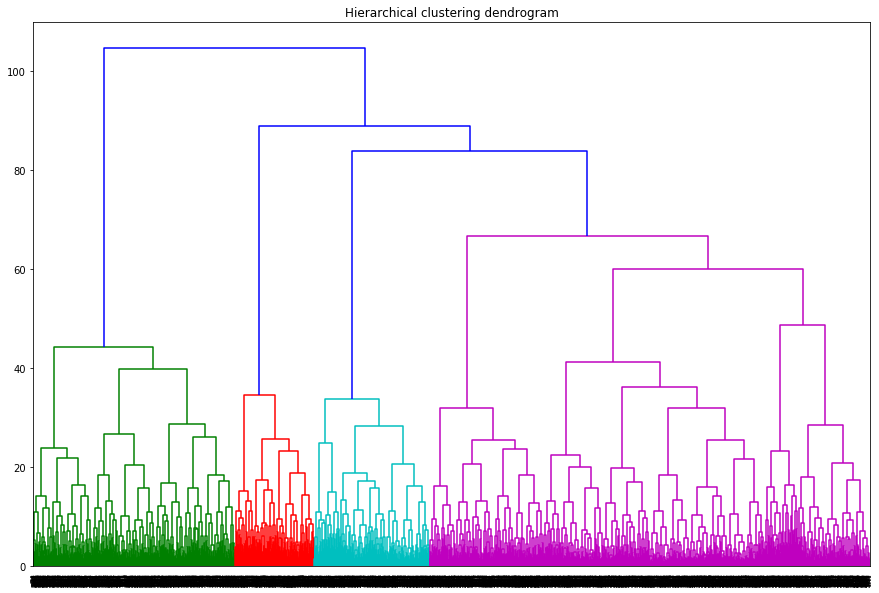

In [37]:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top',show_leaf_counts=True)
plt.title('Hierarchical clustering dendrogram')
plt.show() 

* We can see 4 clusters.

 [Go Up.](#1)⏫

**Now we training the clustering model with the K-means algorithm and predicting customer clusters-**


In [38]:
km = KMeans(n_clusters = 4, random_state=0)
labels = km.fit_predict(x_sc)
gym['cluster'] = labels
gym.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590,0.559838
2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132,0.092715
3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685


### Clusters conclusions-
* Gender distributed more or less equally.
* Most clients **still** live near the gym.
* Cluster 2 (2) with 34% of customers are employees of a partner companies vs 78% for cluster 3.
* There is 3 clusters (1,2,3) that customers provide their phone number and in  cluster 0 they don't.
* The min average contract lenth is almost 2 months for cluster 1 vs 10.7 months for cluster 3.
* The average customer age is between 28 and 30 years old for all clusters.
* The minimum in average a customer spend 130 dollars on additional charges for those cluster 1 vs 161 for cluster 3.
* The min average lifetime is 2.2 months for cluster 2 vs 9.8 months for cluster 3.
* The average class frequency per week during lifetime is 1.2 for cluster 1 vs 2.7 for cluster 2.


 [Go Up.](#1)⏫

### Distributions of features for the clusters

In [39]:
def plot_dist_cluster(df, feature):
    colors = ['#f9c80e','#f86624','#ea3546','#662e9b']
    plt.figure(figsize=(15,15))
    
    the_grid = GridSpec(5, 3)
    for i, column in enumerate(df.drop(feature, axis = 1).columns):
        plt.subplot(the_grid[i//3, i%3], title=column.replace('_',' '))
        values = len(df[column].unique())
        features = sorted(df[feature].unique())
    # continuous vs discrete
        if values > 12:    
            for i,x in enumerate(features):
                sns.distplot(df[df[feature] == x][column], hist = False, 
                             kde_kws = {'shade': True, 'linewidth': 3}, color=colors[i])
        else:
            sns.countplot(column, hue=feature, data=gym, palette=colors, alpha=.5, saturation=1)
            plt.gca().get_legend().remove()
     # xticks       
            if values == 2:
                if column == 'gender':
                    plt.xticks(np.arange(values),('F','M'))
     # legend             
                    if feature == 'cluster':
                        legend = ['0','1','2','3']
                    else:
                        legend = features
                    plt.legend(legend, shadow=True, fancybox=True, title=feature, loc='best')
                else:
                    plt.xticks(np.arange(values),('NO','YES'))
            else:
                plt.xticks(np.arange(values),[int(x) for x in sorted(df[column].unique())])
        plt.xlabel('')
        plt.ylabel('')
    plt.tight_layout()
    plt.suptitle('Distributions of features for the clusters', fontsize=24, y=1.02)
    plt.show()

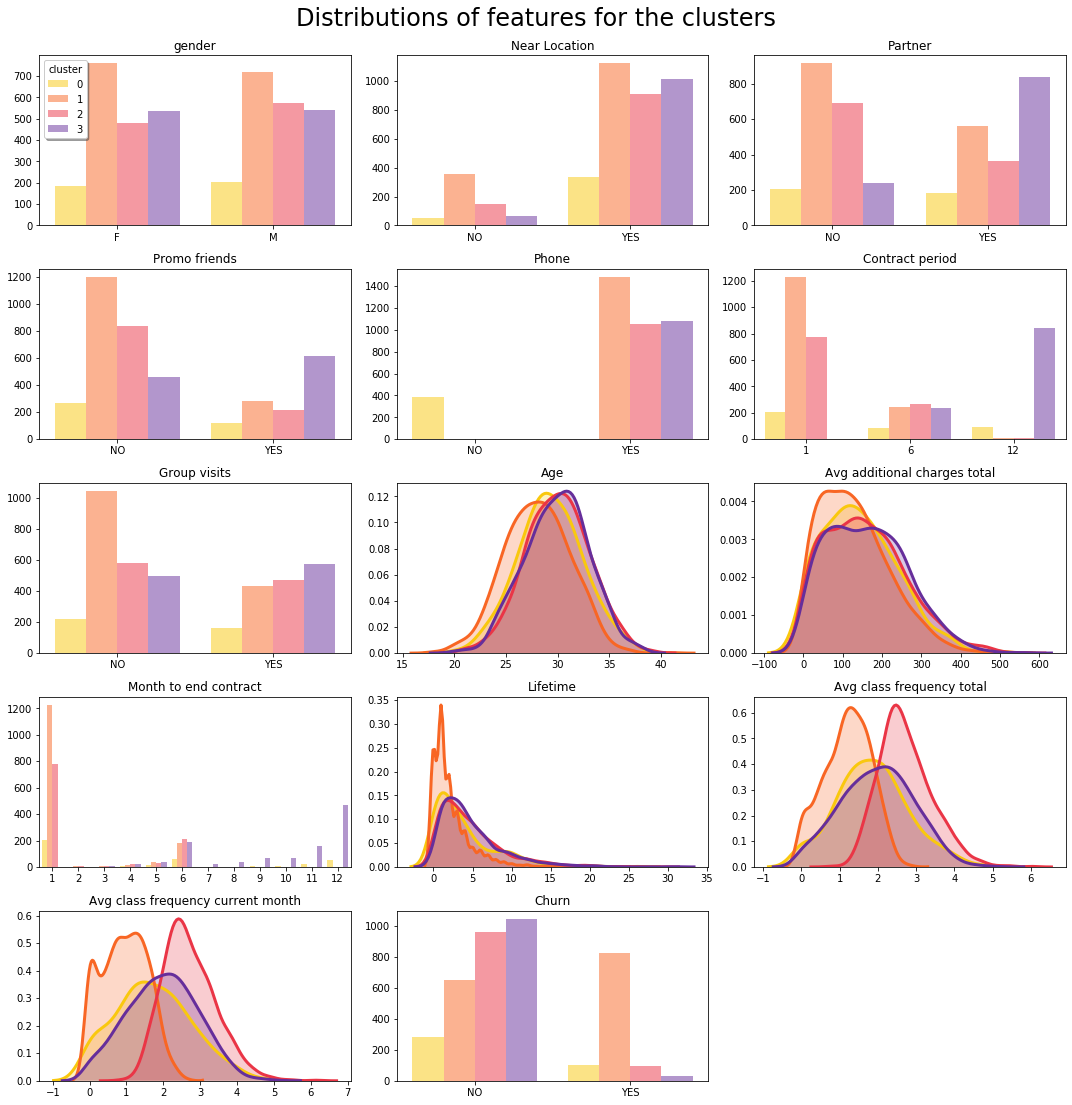

In [40]:
plot_dist_cluster(gym,'cluster')

* We can see pretty much the same picture while ploting distributions of features for the clusters. 

 [Go Up.](#1)⏫

**Now We'll Calculate the churn rate for each cluster-**

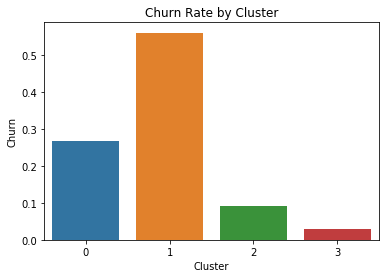

,cluster,Churn
0,0,0.266839
1,1,0.559838
2,2,0.092715
3,3,0.029685


In [41]:
churn=gym.groupby('cluster')['Churn'].mean().reset_index()
sns.barplot(x= 'cluster', y = 'Churn', data=churn)
plt.xlabel('Cluster')
plt.title('Churn Rate by Cluster')
plt.show();
display(churn)

**The most loyal:** Cluster 3.<br>
**The most churn:** Cluster 1.

 [Go Up.](#1)⏫

### Step 4 - Conclusions

* We standardized the data and used the linkage() function in order to built  matrix of distances based on the standardized feature matrix and plot a dendrogram.<br>
**We've got 4 different clusters.**

* We trained the clustering model with the K-means algorithm and predict customer clusters.
* We stored clusters labels in the dataset.
<br>

**We've checked the mean feature values in the clusters an got those results:**

* Gender distributed more or less equally.
* Most clients **still** live near the gym.
* Cluster 2 with 34% of customers are employees of a partner companies vs 78% for cluster 3.
* There is 3 clusters (1,2,3) that customers provide their phone number and in  cluster 0 they don't.
* The min average contract lenth is almost 2 months for cluster 1 vs 10.7 months for cluster 3.
* The average customer age is between 28 and 30 years old for all clusters.
* The minimum in average a customer spend 130 dollars on additional charges for those cluster 1 vs 161 for cluster 3.
* The min average lifetime is 2.2 months for cluster 2 vs 9.8 months for cluster 3.
* The average class frequency per week during lifetime is 1.2 for cluster 1 vs 2.7 for cluster 2.
 

**We calculated the churn rate for each cluster:**
* **The most loyal:** Cluster 3.<br>
* **The most churn:** Cluster 1.

**My recommendation at this point is to offer an in-depth and focused analysis of Cluster 3 to understand the characteristics of much churn.**

Hi:)
1. I made a momentary recommendation (the last line, start with "My recommendation...").
2. All general recommendations are in step 5 (Overall Conclusions & Recommendations).

 [Go Up.](#1)⏫

## Step 5 - Overall Conclusions & Recommendations 

After predicting customer behavior at the gym I can make a number of recommendations to maintain the percentage of repeat customers.<br>

I will start with the loyal customers, it is clear that these customers pay more and therefore a lot of effort must be invested on two levels:
1. Analysis of their characteristics.
2. **Establishment of a loyal customer club that will receive special benefits.**

As for the characteristics of customers who churn, we now know their main characteristics-
* Lifetime for them is mostly a month.
* They spend less money on additional charges.
And Based on our classification we defined a group of customers who are more likely to churn.

**I recommended to planning a customer retention strategy for "cluster 2" in order to rise the retention rate of the most churn group.**

In addition, for already existing customers: the gym need to focus on attaining their phone numbers, encourage them to spend more money on other gym services and increase their amount of weekly visits.<br>
These are all factors that make a customer less likely to churn.<br>
**For example, the gym can encourage weekly visits by having one night a week where there are discounted prices on additional services such as food, spa, etc.**<br>
This encourages customers to come in while also spending money on additional services.<br>
Additionally, focus on customers who have 1-2 months before their current contract ends.<br>
This is when customers are more likely to decide whether to continue their subscription or not. 

The recommendation is also to continue investing in campaigns to recruit more customers while creating an environment similar to the environment in which the loyal customers "grew".

 [Go Up.](#1)⏫